# Rescale readable images

Grab images from the image folder. If they cannot be read (were not downloaded properly, for example) then discard them. Otherwise, resize them and store a downsampled version.

In [48]:
from PIL import Image, UnidentifiedImageError
from pathlib import Path
from glob import glob
import logging
import pandas as pd
from typing import Tuple

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.propagate = False

In [6]:
source_path = '../datasets/pilot_raw'
dest_path = '../datasets/pilot_resized'

min_dimension = 300 # Minimum dimension kept (smaller of height or width) in pixels when rescaling

In [18]:
def get_absolute_path(rel_path: str):
    return(str(Path(rel_path).resolve().absolute()))

source_path_full = get_absolute_path(source_path)
dest_path_full = get_absolute_path(dest_path)
print(source_path_full, '\n', dest_path_full)

/home/code/datasets/pilot_raw 
 /home/code/datasets/pilot_resized


In [24]:
Path(im_path).name

'poison_ivy_vines_9.jpg'

In [25]:
def get_path_types(rel_path: str):
    path_obj = Path(rel_path)
    return({
        'full_path': get_absolute_path(rel_path),
        'rel_path': rel_path,
        'name': path_obj.name
    })
    
df_ims = pd.DataFrame([get_path_types(im_path)
                       for im_path in glob(str(Path(source_path, '**/*.jpg')))]).set_index('name')
df_ims.head()

,full_path,rel_path
name,,
Blackberries_plant_1.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...
Blackberries_plant_10.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...
Blackberries_plant_2.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...
Blackberries_plant_3.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...
Blackberries_plant_4.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...


In [32]:
Image.open(df_ims.at['poison_ivy_plant_4.jpg', 'full_path'])

UnidentifiedImageError: cannot identify image file '/home/code/datasets/pilot_raw/positive/poison_ivy_plant_4.jpg'

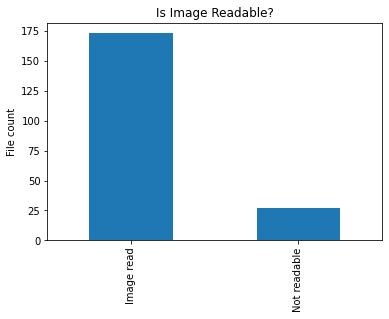

In [40]:
def image_is_readable(im_path: str):
    try:
        Image.open(im_path)
        return True
    except UnidentifiedImageError:
        return False
    
df_ims['is_readable'] = df_ims['full_path'].map(image_is_readable)
df_ims['is_readable'].map(
    lambda val: "Image read" if val else "Not readable") \
    .value_counts().plot(kind = 'bar',title='Is Image Readable?', ylabel='File count');

In [44]:
imgs = [*df_ims[df_ims['is_readable']].index]
print(len(imgs))

df_ims = df_ims.loc[imgs]

173


In [50]:
df_ims['new_full_path'] = df_ims['full_path'].str.replace(source_path_full, dest_path_full)
df_ims['image_dims'] = df_ims['full_path'].map(
    lambda im_path: Image.open(im_path).size)

def resize_by_min_dim(size: Tuple[int, int], min_dim:int =100) -> Tuple[int, int]:
    """
    Resize an image to keep the same proportions and make the smaller
    of the two dimensions equal to min_dim
    size = (width, height) in pixels
    returns (new_width, new_height)
    """
    width, height = size
    new_height = new_width = None
    if width > height:
        new_height = min_dim
        new_width = int((width/height) * new_height)
    else:
        new_width = min_dim
        new_height = int((height/width) * new_width)
    return (new_width, new_height)
    
    
df_ims['new_image_dims'] = df_ims['image_dims'].map(lambda size: resize_by_min_dim(size, min_dimension))
df_ims.head()

,full_path,rel_path,is_readable,new_full_path,image_dims,new_image_dims
name,,,,,,
Blackberries_plant_1.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1662, 1247)","(399, 300)"
Blackberries_plant_10.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1200, 630)","(571, 300)"
Blackberries_plant_2.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1556, 1234)","(378, 300)"
Blackberries_plant_3.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(450, 600)","(300, 400)"
Blackberries_plant_4.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1280, 960)","(400, 300)"


,full_path,rel_path,is_readable,new_full_path,image_dims
name,,,,,
Blackberries_plant_1.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1662, 1247)"
Blackberries_plant_10.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1200, 630)"
Blackberries_plant_2.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1556, 1234)"
Blackberries_plant_3.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(450, 600)"
Blackberries_plant_4.jpg,/home/code/datasets/pilot_raw/negative/Blackbe...,../datasets/pilot_raw/negative/Blackberries_pl...,True,/home/code/datasets/pilot_resized/negative/Bla...,"(1280, 960)"
